In [1]:
#Imports
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
data = pd.read_csv('update7.csv')
data.columns=['ira','irb','irc','ird','ci','ai','col','edge','mean','std','label','name']
data =data.replace([np.inf, -np.inf], np.nan)
data=data.dropna()

X1 = data.iloc[:,0:10] 
y = data.iloc[:,10]
X1.columns


Index(['ira', 'irb', 'irc', 'ird', 'ci', 'ai', 'col', 'edge', 'mean', 'std'], dtype='object')

In [2]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
from sklearn.preprocessing import Normalizer
from sklearn.feature_selection import f_classif
sc = Normalizer()
X = sc.fit_transform(X1)

select_feature = SelectKBest(chi2, k=10).fit(X, y)
select_feature.scores_

array([7.44151546e-05, 1.21059592e-01, 2.42854418e-02, 1.48304988e+00,
       5.97761447e-02, 8.18196976e-02, 1.74172401e-02, 2.37449896e-02,
       2.04688877e+00, 1.03676966e+00])

In [3]:
book={}
name=['Irregular Index A','Irregular Index B','Irregular Index C','Irregular Index D',
     'Circulatory Index','Assymmetry','Colors','Edge Abruptness','Mean','Standard Deviation']
for i in range(0,len(X1.columns)):
    book[X1.columns[i]]=float("{:.4f}".format(select_feature.scores_[i]))

In [4]:
sortedbook={k: v for k, v in sorted(book.items(), key=lambda item: item[1],reverse=True)}
sortedbook

{'mean': 2.0469,
 'ird': 1.483,
 'std': 1.0368,
 'irb': 0.1211,
 'ai': 0.0818,
 'ci': 0.0598,
 'irc': 0.0243,
 'edge': 0.0237,
 'col': 0.0174,
 'ira': 0.0001}

<ipython-input-5-792e1ec0fd12>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([0,500,1000,1500,2000,2500],fontsize=15)


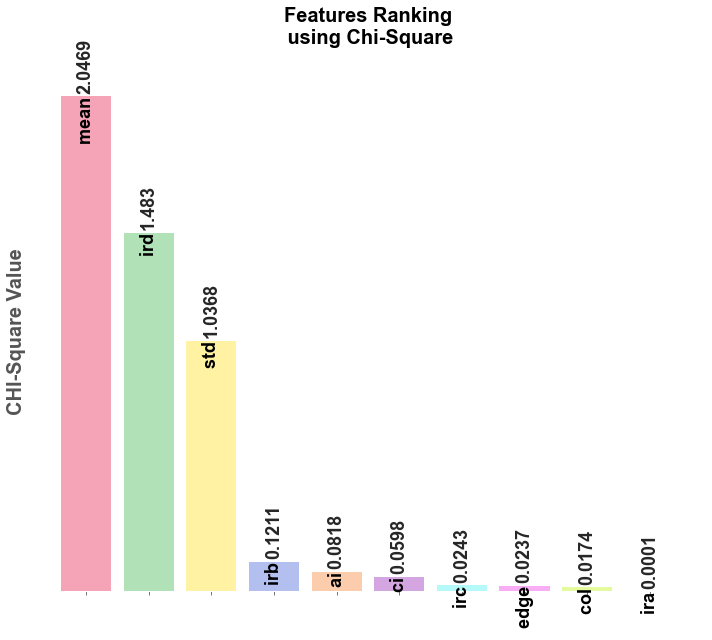

In [5]:
label_freqs=sortedbook



#TEAL
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline



df = pd.DataFrame(columns=('Colour', 'Frequency', 'Percentage'))
total = sum(label_freqs.values())
df['Colour'] = label_freqs.keys()
df['Frequency'] = [val for val in label_freqs.values()]
df['Percentage'] = [val for val in label_freqs.values()]
df = df.sort_values(by='Frequency', ascending=False)

fig, ax = plt.subplots(figsize=(10,9))
ax.set_facecolor('white')
plt.style.use('seaborn-darkgrid')

x_pos = np.arange(len(df))
clr2= ['#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
clr=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff','blue']
ax_bar = ax.bar(x_pos, df['Percentage'],alpha=0.4,color=clr )

ax.set_title("Features Ranking\n using Chi-Square\n", fontsize=20,fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels('',fontsize=15)

ax.set_yticklabels([0,500,1000,1500,2000,2500],fontsize=15)
plt.yticks([],fontweight='bold',fontsize='10')
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
ax.set_ylabel("CHI-Square Value",fontsize='20',fontweight='bold')

for i, (name, height) in enumerate(zip(df['Colour'],df['Percentage'])):
    ax.text(i, height, ' ' + name,
            ha='center', va='top', rotation=90, fontsize=18,fontweight='bold',color='black')
def autolabel(my_bar, raw_freqs):
    """Attach a text label above each bar in *my_bar*, displaying its height."""
    for point, freq in zip(my_bar, raw_freqs):
        height = point.get_height()
        ax.annotate('{}'.format(freq),
                    xy=(point.get_x() + point.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",fontsize = 18,
                    ha='center', va='bottom', rotation=90,fontweight='bold')


autolabel(ax_bar, df['Frequency'])

plt.tight_layout()
plt.show()
plt.close()

In [6]:
lists=[]
for i in sortedbook.keys():
    lists.append(i)
top5=lists[0:5]
top6=lists[0:6]
top7=lists[0:7]
top8=lists[0:8]
top9=lists[0:9]
top10=lists[0:10]
#top11=lists[0:11]
#top12=lists[0:12]
#top13=lists[0:13]
total=[]
total.append(top5)
total.append(top6)
total.append(top7)
total.append(top8)
total.append(top9)
total.append(top10)
#total.append(top11)
#total.append(top12)
#total.append(top13)

In [7]:
# Support Vector Machine (SVM)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Importing the dataset
dataset = pd.read_csv('update7.csv')
dataset =dataset.replace([np.inf, -np.inf], np.nan)
dataset=dataset.dropna()
dataset.columns=['ira','irb','irc','ird','ci','ai','col','edge','mean','std','label','name']
newlist=[]

for i in total:

    
       
    X = dataset[i].values

    y = dataset['label'].values
    print(i)
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 0)




    # Fitting SVM to the Training set
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state =1234)
    classifier.fit(X_train, y_train)


    y_pred=classifier.predict(X_test)

    from sklearn import metrics
    print("No of features: ",len(i))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

['mean', 'ird', 'std', 'irb', 'ai']
No of features:  5
Accuracy: 0.7404063205417607
['mean', 'ird', 'std', 'irb', 'ai', 'ci']
No of features:  6
Accuracy: 0.744920993227991
['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc']
No of features:  7
Accuracy: 0.744920993227991
['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc', 'edge']
No of features:  8
Accuracy: 0.744920993227991
['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc', 'edge', 'col']
No of features:  9
Accuracy: 0.7516930022573364
['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc', 'edge', 'col', 'ira']
No of features:  10
Accuracy: 0.7516930022573364


In [8]:
# Support Vector Machine (SVM)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

# Importing the dataset
dataset = pd.read_csv('update7.csv')
dataset =dataset.replace([np.inf, -np.inf], np.nan)
dataset=dataset.dropna()
dataset.columns=['ira','irb','irc','ird','ci','ai','col','edge','mean','std','label','name']
newlist=[]

for i in total:

    
       
    X = dataset[i].values

    y = dataset['label'].values
    print(i)
    # Splitting the dataset into the Training set and Test set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1,random_state = 0)




    # Fitting SVM to the Training set
    from sklearn.svm import SVC
    classifier = SVC(kernel = 'linear', random_state =1234)
    classifier.fit(X_train, y_train)


    y_pred=classifier.predict(X_test)

    from sklearn import metrics
    print("No of features: ",len(i))
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

['mean', 'ird', 'std', 'irb', 'ai']
No of features:  5
Accuracy: 0.7567567567567568
['mean', 'ird', 'std', 'irb', 'ai', 'ci']
No of features:  6
Accuracy: 0.7477477477477478
['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc']
No of features:  7
Accuracy: 0.7567567567567568
['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc', 'edge']
No of features:  8
Accuracy: 0.7567567567567568
['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc', 'edge', 'col']
No of features:  9
Accuracy: 0.7702702702702703
['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc', 'edge', 'col', 'ira']
No of features:  10
Accuracy: 0.7792792792792793


In [9]:
total

[['mean', 'ird', 'std', 'irb', 'ai'],
 ['mean', 'ird', 'std', 'irb', 'ai', 'ci'],
 ['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc'],
 ['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc', 'edge'],
 ['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc', 'edge', 'col'],
 ['mean', 'ird', 'std', 'irb', 'ai', 'ci', 'irc', 'edge', 'col', 'ira']]